In [2]:
from petrel_client.client import Client as CephClient
client = CephClient()

path = "bridgedata:s3://mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj1/images1/"
files = [x[0] for x in client.get_file_iterator(path) if x[0][-4:] == '.jpg']
print(files)


2023-08-07 23:41:34,201 WAR [MainProcess] [MainThread] - can not init cache client [P:128772 T:140712540596032 F:cache.py:48]
2023-08-07 23:41:34,202 ERR [MainProcess] [MainThread] - 'NoneType' object has no attribute 'max_item_size' [P:128772 T:140712540596032 F:cache.py:49]
Traceback (most recent call last):
  File "/mnt/lustre/zhengjinliang/.local/lib/python3.7/site-packages/petrel_client/cache/cache.py", line 43, in create
    instance = engine_cls(conf, *args, **kwargs)
  File "/mnt/lustre/zhengjinliang/.local/lib/python3.7/site-packages/petrel_client/cache/mc/mc.py", line 73, in __init__
    self._max_item_size = self._mc.max_item_size() - _MAX_KEY_SIZE - \
AttributeError: 'NoneType' object has no attribute 'max_item_size'


['mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj1/images1/im_0.jpg', 'mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj1/images1/im_1.jpg', 'mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj1/images1/im_10.jpg', 'mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj1/images1/im_11.jpg', 'mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj1/images1/im_12.jpg', 'mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj1/images1/im_13.jpg', 'mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/pu

In [3]:
files[0].split('/')[6]

'put_clothes_in_laundry_machine'

In [6]:
import json
with open("BridgeDataV1.json", "w") as f:
    f.write(json.dumps([{'1': '2'}, {'2':'3'}]))

In [20]:
json_dict = {}
for file in  tqdm(files):
    try:
        split = file.split('/')
        traj_path = '/'.join(split[:-1]) + '/' + split[-1].split('_')[0]
        img_num = int(split[-1].split('_')[-1][:-4])
        if traj_path in json_dict.keys():
            json_dict[traj_path]['length'] = max(img_num, json_dict[traj_path]['length'])

        else:
            json_dict[traj_path] = {
                'path': traj_path,
                'length': img_num,
                'instruction': split[6]
            }
    except Exception as e:
        print(f'Error when load {file}')
        print(e)
        break
with open("BridgeDataV1.json", "w") as f:
    json.dump(list(json_dict.values()), f, indent=4)


100%|██████████| 39/39 [00:00<00:00, 244877.03it/s]


In [45]:
from BridgeDataset import BridgeDataV1

dateset = BridgeDataV1(input_shape=256, target_range=range(7,8))

In [53]:
len(dateset)

1221644

In [51]:
from torchvision.transforms import ToPILImage as unloader
import matplotlib.pyplot as plt
import random
id = random.randint(0, 10000)
img1, img2, text = dateset[id]
img1 = img1.unsqueeze(0)
img2 = img2.unsqueeze(0)
_,_,(_,_,ind) = m.encode(img1)
_,_,(_,_,ind2) = m.encode(img2)
sum(ind == ind2)

tensor(493)

In [101]:
ind2.sort()[0]

tensor([  195,   226,   277,   517,   551,   551,   576,   623,   766,   778,
          801,   914,  1015,  1072,  1072,  1085,  1162,  1258,  1300,  1319,
         1398,  1543,  1557,  1557,  1741,  1924,  1934,  1991,  2051,  2190,
         2317,  2446,  2630,  2636,  2636,  2637,  2644,  2699,  2775,  2811,
         2811,  2872,  2909,  2909,  2923,  2923,  2923,  3001,  3049,  3049,
         3108,  3119,  3119,  3186,  3252,  3256,  3443,  3544,  3635,  3635,
         3810,  3810,  4254,  4254,  4288,  4302,  4347,  4347,  4375,  4405,
         4405,  4405,  4405,  4405,  4606,  4626,  4626,  4683,  4716,  4745,
         4773,  4855,  4896,  5102,  5148,  5179,  5179,  5231,  5362,  5392,
         5444,  5618,  5678,  6170,  6298,  6330,  6436,  6630,  6636,  6653,
         6716,  6829,  6855,  6935,  7049,  7198,  7198,  7221,  7221,  7311,
         7311,  7409,  7424,  7479,  7479,  7670,  7670,  7678,  7770,  7832,
         7852,  7862,  7901,  7925,  7936,  8170,  8380,  8464, 

In [102]:
ind.sort()[0]

tensor([  551,   551,   576,   623,   625,   766,   846,   951,  1015,  1015,
         1015,  1072,  1072,  1074,  1085,  1162,  1198,  1258,  1258,  1366,
         1384,  1384,  1543,  1557,  1557,  1924,  1991,  2108,  2108,  2190,
         2190,  2317,  2533,  2636,  2644,  2811,  2811,  2811,  2872,  2909,
         2923,  3049,  3049,  3119,  3119,  3184,  3184,  3186,  3252,  3256,
         3289,  3355,  3438,  3443,  3445,  3492,  3504,  3544,  3635,  3635,
         4088,  4243,  4254,  4405,  4405,  4405,  4407,  4427,  4529,  4626,
         4664,  4716,  4745,  4746,  4855,  4953,  5014,  5102,  5148,  5296,
         5323,  5362,  5444,  5559,  5618,  5678,  5678,  5771,  5804,  5916,
         6170,  6227,  6273,  6324,  6385,  6404,  6436,  6465,  6557,  6578,
         6609,  6630,  6716,  6726,  6821,  6829,  6855,  6897,  7114,  7311,
         7409,  7479,  7670,  7670,  7695,  7730,  7737,  7770,  7832,  7852,
         7862,  7901,  7936,  7936,  8004,  8059,  8223,  8223, 

In [90]:
ind.sort()

torch.return_types.sort(
values=tensor([  109,   109,   226,   247,   277,   503,   623,   625,   801,   907,
         1015,  1063,  1071,  1072,  1093,  1198,  1198,  1198,  1218,  1258,
         1384,  1495,  1495,  1703,  1715,  1820,  1940,  1998,  2086,  2190,
         2385,  2446,  2446,  2636,  2775,  2837,  2909,  2923,  2987,  2987,
         3001,  3057,  3067,  3119,  3184,  3256,  3256,  3355,  3492,  3492,
         3496,  3544,  3665,  3792,  3810,  3810,  3830,  3832,  3971,  4113,
         4208,  4254,  4288,  4288,  4407,  4412,  4516,  4683,  4683,  4745,
         4745,  4760,  4855,  4866,  4872,  5014,  5102,  5231,  5275,  5306,
         5556,  5719,  5719,  5784,  5804,  5916,  6005,  6170,  6224,  6227,
         6404,  6434,  6436,  6609,  6636,  6636,  6653,  6658,  6720,  6726,
         6821,  6829,  6829,  6888,  6897,  6968,  6979,  7088,  7114,  7489,
         7573,  7579,  7695,  7726,  7730,  7737,  7812,  7901,  8170,  8223,
         8235,  8530,  8530,  87

In [8]:
from VQVAE.AutoEncoder import VQModel
import yaml
import torch
import sys
sys.path.append("/mnt/lustre/zhengjinliang/taming-transformers")
# This line of code is used to choose a model
model_name = 'vq-8-n256'

with open(f"/mnt/lustre/zhengjinliang/vision-language-model/ldm/configs/{model_name}/config.yaml", "r") as f:
    file = yaml.load(f.read(), Loader=yaml.FullLoader)
model_kwargs = file['model']['params']
m = VQModel(**model_kwargs)
state = torch.load(f"/mnt/lustre/zhengjinliang/vision-language-model/ldm/configs/{model_name}/model.ckpt", map_location='cpu')
state = state['state_dict']
m.load_state_dict(state, strict=False)

making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels


_IncompatibleKeys(missing_keys=[], unexpected_keys=['loss.perceptual_loss.scaling_layer.shift', 'loss.perceptual_loss.scaling_layer.scale', 'loss.perceptual_loss.net.slice1.0.weight', 'loss.perceptual_loss.net.slice1.0.bias', 'loss.perceptual_loss.net.slice1.2.weight', 'loss.perceptual_loss.net.slice1.2.bias', 'loss.perceptual_loss.net.slice2.5.weight', 'loss.perceptual_loss.net.slice2.5.bias', 'loss.perceptual_loss.net.slice2.7.weight', 'loss.perceptual_loss.net.slice2.7.bias', 'loss.perceptual_loss.net.slice3.10.weight', 'loss.perceptual_loss.net.slice3.10.bias', 'loss.perceptual_loss.net.slice3.12.weight', 'loss.perceptual_loss.net.slice3.12.bias', 'loss.perceptual_loss.net.slice3.14.weight', 'loss.perceptual_loss.net.slice3.14.bias', 'loss.perceptual_loss.net.slice4.17.weight', 'loss.perceptual_loss.net.slice4.17.bias', 'loss.perceptual_loss.net.slice4.19.weight', 'loss.perceptual_loss.net.slice4.19.bias', 'loss.perceptual_loss.net.slice4.21.weight', 'loss.perceptual_loss.net.slice

In [2]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import io
from petrel_client.client import Client as CephClient
client = CephClient()
value = client.Get("bridgedata:s3://mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj1/images1/im_0.jpg")
img_bytes = np.fromstring(value, np.uint8)
buff = io.BytesIO(img_bytes)
img = Image.open(buff)
img = img.convert('RGB')
img = img.resize((128,128))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)
quant, emb_loss, info = m.encode(img)

print(quant.shape)
print(quant)

2023-08-10 09:57:37,159 WAR [MainProcess] [MainThread] - can not init cache client [P:143162 T:139767024404288 F:cache.py:48]
2023-08-10 09:57:37,161 ERR [MainProcess] [MainThread] - 'NoneType' object has no attribute 'max_item_size' [P:143162 T:139767024404288 F:cache.py:49]
Traceback (most recent call last):
  File "/mnt/lustre/zhengjinliang/.local/lib/python3.7/site-packages/petrel_client/cache/cache.py", line 43, in create
    instance = engine_cls(conf, *args, **kwargs)
  File "/mnt/lustre/zhengjinliang/.local/lib/python3.7/site-packages/petrel_client/cache/mc/mc.py", line 73, in __init__
    self._max_item_size = self._mc.max_item_size() - _MAX_KEY_SIZE - \
AttributeError: 'NoneType' object has no attribute 'max_item_size'
/mnt/cache/share/spring/conda_envs/miniconda3/envs/s0.3.5/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ ==

torch.Size([1, 4, 16, 16])
tensor([[[[ 2.3767, -0.8013,  0.4509,  ..., -0.3872,  0.4912,  1.7947],
          [-0.6324,  1.2650,  1.8034,  ...,  0.0368, -1.1541,  1.4364],
          [-0.3872, -0.4577,  0.3783,  ..., -1.1628, -0.8619,  0.9974],
          ...,
          [ 0.1740, -1.1946,  0.1829,  ...,  2.4754,  1.0886,  0.3894],
          [ 0.2336, -0.2919,  1.3200,  ...,  0.0368,  0.0368,  0.3783],
          [ 1.9975,  2.9846,  0.3254,  ...,  1.3726,  0.5375,  0.8765]],

         [[-1.4554,  0.3396, -0.0750,  ...,  0.2094, -0.0869, -1.2145],
          [ 0.3492, -0.8624, -0.9100,  ..., -0.2097,  0.4812, -0.8671],
          [ 0.2094,  0.5265, -0.2567,  ...,  0.6331,  0.3831, -0.3885],
          ...,
          [-0.1467,  0.8569,  0.0488,  ..., -1.3523, -0.5201, -0.2441],
          [ 0.1503,  0.0679, -0.9167,  ..., -0.2097, -0.2097, -0.2567],
          [-1.1605, -1.7406, -0.1542,  ..., -0.7102, -0.4333, -0.4923]],

         [[-0.3848, -1.0392,  0.2174,  ..., -0.9701,  0.4622, -1.4565],
   

In [51]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import io
from petrel_client.client import Client as CephClient
client = CephClient()
value = client.Get("bridgedata:s3://mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj6/images1/im_30.jpg")
img_bytes = np.fromstring(value, np.uint8)
buff = io.BytesIO(img_bytes)
img = Image.open(buff)
img = img.convert('RGB')
img = img.resize((128,128))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)
img = torch.cat([img,img], dim=0)
out, diff, (_,_,indices) = m.encode(img)
# plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())
# print(indices)
print(out.shape, indices.shape)


/mnt/cache/share/spring/conda_envs/miniconda3/envs/s0.3.5/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


torch.Size([2, 4, 16, 16]) torch.Size([512])


/mnt/cache/share/spring/conda_envs/miniconda3/envs/s0.3.5/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


256

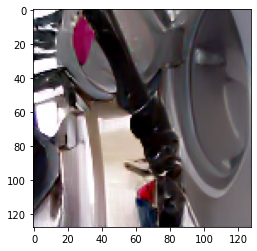

In [5]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import io
from petrel_client.client import Client as CephClient
client = CephClient()
value = client.Get("bridgedata:s3://mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj6/images1/im_20.jpg")
img_bytes = np.fromstring(value, np.uint8)
buff = io.BytesIO(img_bytes)
img = Image.open(buff)
img = img.convert('RGB')
img = img.resize((128,128))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)
out, diff, indices = m(img, return_pred_indices=True)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())
len(indices)

/mnt/cache/share/spring/conda_envs/miniconda3/envs/s0.3.5/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([122, 226,   0, 104,  96,  80, 142, 229, 139, 228,  24,  25, 136, 108,
        135, 139,  20,  14,  48, 199,   5, 113,  58,  35,  81, 168, 123, 124,
         25, 139, 137,  17, 169,  44, 149,  46, 113, 229,  24,  31,  11,  50,
        152, 228, 211,  20, 212, 184, 198, 198,  86, 241,  27,  30, 148,  11,
        242, 128, 135,  64,  60,  20, 251, 107, 230, 154, 184,  83, 135,  74,
         74,  56,  98, 217, 193,  68, 102, 165, 230, 241,  34,  43,   9, 249,
        235,  98, 219,  63,  17, 139,  27,  60, 139, 218,  39, 252,  30,  43,
        143, 246, 200, 218,  96,  58, 253, 184, 211,  28, 204,  29,  51,  17,
        204, 229, 247, 110,  86, 190,  70, 251, 249, 209, 221,  74, 196, 251,
        246,  83,  30,  43, 154,  79,  96, 113,  56, 143,  11, 138,   6, 138,
        214, 161, 158,  38,  30,  20, 146,  75, 160, 147,  55,  92, 160,  45,
        252, 226, 250,  56,  96, 198,  43, 191,  95, 182, 141,  52,  23, 236,
         69, 132,  47,  14, 226, 131, 121,  51, 169, 206, 110, 1

256

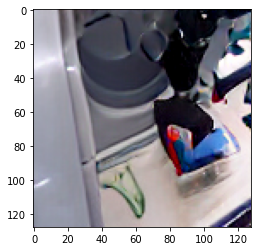

In [54]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import io
from petrel_client.client import Client as CephClient
client = CephClient()
value = client.Get("bridgedata:s3://mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj6/images2/im_10.jpg")
img_bytes = np.fromstring(value, np.uint8)
buff = io.BytesIO(img_bytes)
img = Image.open(buff)
img = img.convert('RGB')
img = img.resize((128,128))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)
out, diff, indices = m(img, return_pred_indices=True)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())
print(indices)
len(indices)

/mnt/cache/share/spring/conda_envs/miniconda3/envs/s0.3.5/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([10678, 13312,  8732,  ...,  3857,  1366, 12456])


4800

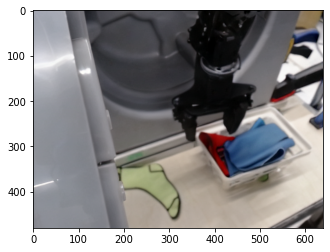

In [40]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import io
from petrel_client.client import Client as CephClient
client = CephClient()
value = client.Get("bridgedata:s3://mydata/bridgedata/raw/bridge_data_v1/berkeley/laundry_machine/put_clothes_in_laundry_machine/2022-03-19_13-25-01/raw/traj_group0/traj6/images2/im_6.jpg")
img_bytes = np.fromstring(value, np.uint8)
buff = io.BytesIO(img_bytes)
img = Image.open(buff)
img = img.convert('RGB')
img = img.resize((640,480))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)
out, diff, indices = m(img, return_pred_indices=True)
plt.imshow(out.squeeze().permute(1, 2, 0).detach().numpy())
print(indices)
len(indices)